In [1]:
import pandas as pd

In [2]:
from scipy.sparse import coo_matrix
import h5py
import logging
import numpy as np
import pandas as pd

def parse_go_hd5(filename):
    """
    Loads data in file to dataframe.
    """
    with h5py.File(filename, 'r') as f:
        col_uid = []
        logging.debug("reading matrix...")
        row = [ s.decode() for s in  f['GO'][:] ]
        columns = [ s.decode() for s in  f['genes'][:] ]
        matrix = f['ind'][:] - 1 #the indices in this matrix are stored from 1 
        coo = coo_matrix(( np.ones(1901323) , (matrix[0,:],matrix[1,:] )), shape=(len(columns), len(row)) )
        logging.debug("reading columns. converting to unicode")
        df = pd.DataFrame(coo.toarray(),  index=columns, columns = row )
        duplicates = df.index.duplicated(keep='first')
        df = df.loc[~duplicates, :]
    return df

def parse_expression_hd5_lee(filename):
    """
    Loads data in file to dataframe.
    """
    col_uid = []
    row_uid = []
    with h5py.File(filename, 'r') as f:
        logging.debug("reading matrix...")
        matrix = f['agg'][:]
        logging.debug("reading rows. converting to unicode.")
        rows = [ s.decode() for s in  f['row'][:] ]
        counter = 0
        for x in rows:
            try:
                x_o = x.split(".")[0]
                row_uid.append(x_o)
            except KeyError:
                counter = counter + 1
                row_uid.append('del')
        logging.debug("reading columns. converting to unicode")
        columns = [ s.decode() for s in  f['col'][:] ]
        for x in columns:
            try:
                x_o = x.split(".")[0]
                col_uid.append(x_o)
            except KeyError:
                col_uid.append('del')
        logging.debug("making dataframe...")
        df = pd.DataFrame(matrix,  index=row_uid, columns = col_uid)
    duplicates = df.index.duplicated(keep='first')
    df = df.loc[~duplicates, ~duplicates]


    return df 

In [3]:
go_df = parse_go_hd5("/data/johlee/CoCoCoNet/gene2go/human_gene2go.hdf5")

In [5]:
exp_df = parse_expression_hd5_lee('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.h5')



FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [21]:
exp_df

ENSG00000278267  ENSG00000233750  ENSG00000268903  \
ENSG00000278267         1.000000         0.343890         0.487717   
ENSG00000233750         0.343890         1.000000         0.860658   
ENSG00000268903         0.487717         0.860658         1.000000   
ENSG00000269981         0.504516         0.809451         0.946427   
ENSG00000241860         0.479969         0.673940         0.811533   
...                          ...              ...              ...   
ENSG00000276345         0.085152         0.055478         0.092469   
ENSG00000277856         0.025113         0.045883         0.077274   
ENSG00000275063         0.005367         0.013963         0.031017   
ENSG00000278817         0.458116         0.154940         0.374283   
ENSG00000277196         0.389884         0.049407         0.242737   

                 ENSG00000269981  ENSG00000241860  ENSG00000279928  \
ENSG00000278267         0.504516         0.479969         0.343116   
ENSG00000233750         0.809451         0.673940         0.028341   
ENSG00000268903         0.946427         0.811533         0.065573   
ENSG00000269981         1.000000         0.833857         0.110389   
ENSG00000241860         0.833857         1.000000         0.083856   
...                          ...              ...              ...   
ENSG00000276345         0.101842         0.018642         0.001793   
ENSG00000277856         0.079891         0.034978         0.067405   
ENSG00000275063         0.014742         0.019394         0.019134   
ENSG00000278817         0.169647         0.278851         0.255696   
ENSG00000277196         0.230788         0.139266         0.257408   

                 ENSG00000279457  ENSG00000228463  ENSG00000237094  \
ENSG00000278267         0.896050         0.229694         0.550274   
ENSG00000233750         0.463029         0.399338         0.764022   
ENSG00000268903         0.767021         0.441015         0.856639   
ENSG00000269981         0.656542         0.527122         0.903084   
ENSG00000241860         0.508489         0.340035         0.944649   
...                          ...              ...              ...   
ENSG00000276345         0.261986         0.020327         0.091009   
ENSG00000277856         0.140386         0.012266         0.094181   
ENSG00000275063         0.067660         0.011989         0.042390   
ENSG00000278817         0.762126         0.355218         0.176952   
ENSG00000277196         0.619342         0.117430         0.171613   

                 ENSG00000225972  ...  ENSG00000275594  ENSG00000276497  \
ENSG00000278267         0.208983  ...         0.089306         0.275199   
ENSG00000233750         0.018238  ...         0.042306         0.004487   
ENSG00000268903         0.194718  ...         0.019009         0.025281   
ENSG00000269981         0.067739  ...         0.069903         0.070774   
ENSG00000241860         0.002976  ...         0.208856         0.125405   
...                          ...  ...              ...              ...   
ENSG00000276345         0.017107  ...         0.007437         0.026895   
ENSG00000277856         0.032696  ...         0.003437         0.000490   
ENSG00000275063         0.051837  ...         0.005523         0.000559   
ENSG00000278817         0.365041  ...         0.063697         0.229018   
ENSG00000277196         0.250084  ...         0.012124         0.167913   

                 ENSG00000273850  ENSG00000271254  ENSG00000275405  \
ENSG00000278267         0.708864         0.491642         0.013446   
ENSG00000233750         0.202850         0.146670         0.028417   
ENSG00000268903         0.510202         0.078068         0.015855   
ENSG00000269981         0.478497         0.264099         0.021557   
ENSG00000241860         0.327995         0.624400         0.257520   
...                          ...              ...              ...   
ENSG00000276345         0.174295         0.115015         0.018660   
ENSG00000277856         0.095768 

In [24]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler

In [ ]:
SRP_name='aggregates'
resolution='40kbp_raw'
exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{SRP_name}/{resolution}/max/hic_gene_gw_KR_KR.h5'

jac_sim = hm.hiCMatrix(exp_file_path)
all_genes = [x[3].decode() for x in jac_sim.cut_intervals]
df_jac = pd.DataFrame(jac_sim.matrix.toarray() ,  index=all_genes, columns = all_genes)


In [ ]:
SRP_name='aggregates'
resolution='40kbp_raw'
exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/{SRP_name}/{resolution}/max/jac_sim/90/all_bins/KR_ranked_KR/hic_gene_corr_gw.h5'

jac_sim = hm.hiCMatrix(exp_file_path)
all_genes = [x[3].decode() for x in jac_sim.cut_intervals]
df_jac_corr = pd.DataFrame(jac_sim.matrix.toarray() ,  index=all_genes, columns = all_genes)

In [6]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck
def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    #print(nw.index)
    #nw.columns = nw.columns.astype(int)
    #print(nw.columns.astype(int))
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'

    #nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    #nw = nw.loc[nw_mask, nw_mask].astype('float')
    #np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)

def _runNV(go, nw, nFold=3, min_count=20, max_count=5000):

    #Make sure genes are same in go and nw
    #go.index = go.index.map(str) 
    #nw.index = nw.index.map(str)
    #nw.index = nw.index.str.replace('_', '')
    #go.index = go.index.str.replace('_', '')
    #print (nw)
    genes_intersect = go.index.intersection(nw.index)


    #print (genes_intersect)
    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]
    #print (go)
    print (nw.shape)
    print (go.shape)
    sparsity = 1.0 - np.count_nonzero(go) / go.size
    print (sparsity)
    sparsity = 1.0 - np.count_nonzero(nw) / nw.size
    print (sparsity)
    #print(nw
    #print(go
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype('float')
    np.fill_diagonal(nw.values, 1)
    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]

    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]
    #print(go)

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns), go

def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    #print(x, y)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        #print(a)
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()

    CVgo = np.concatenate(list(cvgo.values()), axis=1)
    #print(CVgo)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)
    #print(degree)
    #print(degree[:, None])

    predicts = sumin / degree[:, None]
    #print(predicts)

    np.place(predicts, CVgo > 0, np.nan)

    #print(predicts)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)
    #print(predicts2)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan
    #print(predicts2)

    filtering = np.tile(go, nFold)
    #print(filtering)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *
                                                (n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn
    #print(roc)
    return roc, avg_degree, roc_null, P

In [16]:
df_2d, go_chrom  = run_egad(go_df, exp_df)

(15626, 15626)
(15626, 22517)
0.9952848856816922
0.0


In [36]:
df_2d, go_chrom  = run_egad(go_df, df_jac)

(18163, 18163)
(18163, 22517)
0.9955355307154238
0.006526318412959364


<ipython-input-6-a09629c0c213>:133: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


In [18]:
go_chrom

GO:0000003  GO:0000018  GO:0000027  GO:0000030  GO:0000038  \
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         1.0         0.0         0.0         0.0   

                 GO:0000041  GO:0000045  GO:0000049  GO:0000070  GO:0000075  \
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         0.0         0.0   

                 ...  GO:2001239  GO:2001240  GO:2001242  GO:2001243  \
ENSG00000121410  ...         0.0         0.0         0.0         0.0   
ENSG00000175899  ...         0.0         0.0         0.0         0.0   
ENSG00000171428  ...         0.0         0.0         0.0         0.0   
ENSG00000196136  ...         0.0         0.0         0.0         0.0   
ENSG00000114771  ...         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
ENSG00000284753  ...         0.0         0.0         0.0         0.0   
ENSG00000267221  ...         0.0         0.0         0.0         0.0   
ENSG00000283288  ...         0.0         0.0         0.0         0.0   
ENSG00000273238  ...         0.0         0.0         0.0         0.0   
ENSG00000253251  ...         0.0         0.0         0.0         0.0   

                 GO:2001244  GO:2001251  GO:2001252  GO:2001257  GO:2001258  \
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         0.0         0.0   

                 GO:2001259  
ENSG00000121410         0.0  
ENSG00000175899         0.0  
ENSG00000171428         0.0  
ENSG00000196136         0.0  
ENSG00000114771         0.0  
...                     ...  
ENSG00000284753         0.0  
ENSG00000267221         0.0  
ENSG00000283288         0.0  
ENSG0

In [3]:
import pandas as pd
pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/human_dist_egad_intra_only.csv', sep='\t')


Unnamed: 0     GO_term       AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC  \
0           val  GO:0000018  0.536013              NaN         0.532801   
1           val  GO:0000027  0.529916              NaN         0.652225   
2           val  GO:0000028  0.558956              NaN         0.660327   
3           val  GO:0000030  0.517042              NaN         0.575052   
4           val  GO:0000038  0.609035              NaN         0.407008   
...         ...         ...       ...              ...              ...   
5657        val  GO:2001251  0.505430              NaN         0.538869   
5658        val  GO:2001252  0.492776              NaN         0.527185   
5659        val  GO:2001257  0.507186              NaN         0.407812   
5660        val  GO:2001258  0.484847              NaN         0.428377   
5661        val  GO:2001259  0.524553              NaN         0.407562   

       P_Value  
0     0.037717  
1     0.270496  
2     0.096927  
3     0.064832  
4     0.008717  
...        ...  
5657  0.104949  
5658  0.342973  
5659  0.198540  
5660  0.238282  
5661  0.248467  

[5662 rows x 6 columns]

In [39]:
import pandas as pd
df  = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/human_dist_egad_intra_only.csv', sep='\t')


In [22]:
import pandas as pd
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_coexp_egad_all.csv', sep='\t')

 

In [13]:
df = pd.read_csv('/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/hic_gene_gw_KR_KR_egad_inter_only.csv' , sep='\t')



In [19]:
df

Unnamed: 0     GO_term       AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC  \
0           val  GO:0000018  0.477868     17320.765436         0.561894   
1           val  GO:0000027  0.714087     13841.610107         0.375063   
2           val  GO:0000028  0.685248     12967.583756         0.407942   
3           val  GO:0000030  0.528446     17633.187708         0.504279   
4           val  GO:0000038  0.461976     14151.169672         0.541443   
...         ...         ...       ...              ...              ...   
5657        val  GO:2001251  0.523530     17534.057938         0.551363   
5658        val  GO:2001252  0.576252     20641.947476         0.585716   
5659        val  GO:2001257  0.489754     21387.827886         0.573335   
5660        val  GO:2001258  0.512359     23476.487848         0.491770   
5661        val  GO:2001259  0.493255     17522.746696         0.514928   

       P_Value  
0     0.086985  
1     0.000028  
2     0.005131  
3     0.203995  
4     0.136459  
...        ...  
5657  0.078330  
5658  0.000216  
5659  0.259882  
5660  0.285635  
5661  0.033731  

[5662 rows x 6 columns]

In [40]:
GO_groups = pd.read_csv('/data/bharris/GO_data/aug4.GOslim', names=["go_id"])
df = df[df['GO_term'].isin(GO_groups['go_id'].tolist())]

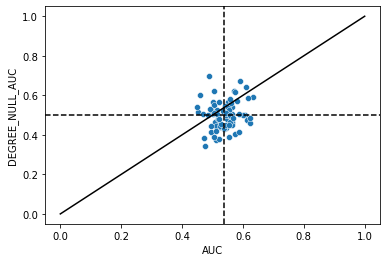

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

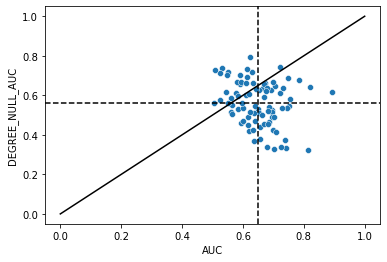

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [42]:
df_whole = pd.read_csv('/data/bharris/GO_data/go_annotation_descriptions.csv').merge(df, left_on='X', right_on='GO_term')



In [43]:
df_whole = df_whole[df_whole['X.2'] == 'molecular_function']

In [53]:
df_whole[df_whole['DEGREE_NULL_AUC'] > 0.5]

Unnamed: 0_x           X                                       X.1  \
2           2750  GO:0003729                              mRNA binding   
3           2756  GO:0003735        structural constituent of ribosome   
5           3315  GO:0004386                         helicase activity   
6           3429  GO:0004518                         nuclease activity   
7           4011  GO:0005198              structural molecule activity   
37          6224  GO:0008135  translation factor activity; RNA binding   
38          6255  GO:0008168                methyltransferase activity   
43         10388  GO:0016491                   oxidoreductase activity   
47         10648  GO:0016779           nucleotidyltransferase activity   
52         10716  GO:0016853                        isomerase activity   
53         10737  GO:0016874                           ligase activity   
54         10749  GO:0016887                           ATPase activity   
56         12700  GO:0019843                              rRNA binding   
62         15602  GO:0032182            ubiquitin-like protein binding   
71         27694  GO:0051082                  unfolded protein binding   

                   X.2 Unnamed: 0_y     GO_term       AUC  AVG_NODE_DEGREE  \
2   molecular_function          val  GO:0003729  0.634489              NaN   
3   molecular_function          val  GO:0003735  0.590447              NaN   
5   molecular_function          val  GO:0004386  0.535489              NaN   
6   molecular_function          val  GO:0004518  0.570391              NaN   
7   molecular_function          val  GO:0005198  0.606439              NaN   
37  molecular_function          val  GO:0008135  0.579256              NaN   
38  molecular_function          val  GO:0008168  0.492394              NaN   
43  molecular_function          val  GO:0016491  0.564910              NaN   
47  molecular_function          val  GO:0016779  0.447701              NaN   
52  molecular_function          val  GO:0016853  0.550953              NaN   
53  molecular_function          val  GO:0016874  0.554369              NaN   
54  molecular_function          val  GO:0016887  0.543820              NaN   
56  molecular_function          val  GO:0019843  0.489923              NaN   
62  molecular_function          val  GO:0032182  0.516031              NaN   
71  molecular_function          val  GO:0051082  0.555954              NaN   

    DEGREE_NULL_AUC       P_Value  
2          0.589148  8.456143e-27  
3          0.671542  7.728047e-06  
5          0.520138  6.090089e-02  
6          0.621112  1.621472e-04  
7          0.502893  1.920667e-22  
37         0.572912  4.664507e-03  
38         0.528306  1.235336e-02  
43         0.507873  7.019650e-10  
47         0.542838  1.442399e-02  
52         0.541337  6.354254e-03  
53         0.527249  7.679669e-03  
54         0.501268  6.315346e-04  
56         0.695260  2.001738e-01  
62         0.503580  1.621130e-01  
71         0.582697  2.439130e-02

In [54]:
df_whole.sort_values(by=['DEGREE_NULL_AUC'])

Unnamed: 0_x           X  \
48         10658  GO:0016791   
35          6188  GO:0008092   
41          6364  GO:0008289   
36          6223  GO:0008134   
45         10628  GO:0016757   
42         10257  GO:0016301   
51         10692  GO:0016829   
46         10636  GO:0016765   
39          6314  GO:0008233   
67         20641  GO:0042393   
4           2906  GO:0003924   
60         14168  GO:0030674   
49         10664  GO:0016798   
50         10674  GO:0016810   
44         10617  GO:0016746   
54         10749  GO:0016887   
7           4011  GO:0005198   
62         15602  GO:0032182   
43         10388  GO:0016491   
5           3315  GO:0004386   
53         10737  GO:0016874   
38          6255  GO:0008168   
52         10716  GO:0016853   
47         10648  GO:0016779   
37          6224  GO:0008135   
71         27694  GO:0051082   
2           2750  GO:0003729   
6           3429  GO:0004518   
3           2756  GO:0003735   
56         12700  GO:0019843   

                                                  X.1                 X.2  \
48                               phosphatase activity  molecular_function   
35                       cytoskeletal protein binding  molecular_function   
41                                      lipid binding  molecular_function   
36                       transcription factor binding  molecular_function   
45  transferase activity; transferring glycosyl gr...  molecular_function   
42                                    kinase activity  molecular_function   
51                                     lyase activity  molecular_function   
46  transferase activity; transferring alkyl or ar...  molecular_function   
39                                 peptidase activity  molecular_function   
67                                    histone binding  molecular_function   
4                                     GTPase activity  molecular_function   
60                          protein binding; bridging  molecular_function   
49       hydrolase activity; acting on glycosyl bonds  molecular_function   
50  hydrolase activity; acting on carbon-nitrogen ...  molecular_function   
44     transferase activity; transferring acyl groups  molecular_function   
54                                    ATPase activity  molecular_function   
7                        structural molecule activity  molecular_function   
62                     ubiquitin-like protein binding  molecular_function   
43                            oxidoreductase activity  molecular_function   
5                                   helicase activity  molecular_function   
53                                    ligase activity  molecular_function   
38                         methyltransferase activity  molecular_function   
52                                 isomerase activity  molecular_function   
47                    nucleotidyltransferase activity  molecular_function   
37           translation factor activity; RNA binding  molecular_function   
71                           unfolded protein binding  molecular_function   
2                                        mRNA binding  molecular_function   
6                                   nuclease activity  molecular_function   
3                  structural constituent of ribosome  molecular_function   
56                                       rRNA binding  molecular_function   

   Unnamed: 0_y     GO_term       AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC  \
48          val  GO:0016791  0.511880              NaN         0.418245   
35          val  GO:0008092  0.538358              NaN         0.431854   
41          val  GO:0008289  0.538418              NaN         0.433339   
36          val  GO:0008134  0.523630              NaN         0.445740   
45          val  GO:0016757  0.562545              NaN         0.448886   
42          val  GO:0016301  0.544178              NaN         0.451263   
51          val  GO:0016829  0.528293              NaN         0.457389   
46          val  GO:001

In [ ]:
df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv', sep='\t')



In [45]:
df

Unnamed: 0     GO_term       AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC  \
102         val  GO:0000902  0.475737              NaN         0.345922   
420         val  GO:0003013  0.509934              NaN         0.374424   
479         val  GO:0003729  0.634489              NaN         0.589148   
481         val  GO:0003735  0.590447              NaN         0.671542   
493         val  GO:0003924  0.546512              NaN         0.479000   
...         ...         ...       ...              ...              ...   
3999        val  GO:0051082  0.555954              NaN         0.582697   
4034        val  GO:0051186  0.586589              NaN         0.505166   
4072        val  GO:0051301  0.485717              NaN         0.498737   
4130        val  GO:0051604  0.557073              NaN         0.498642   
4374        val  GO:0061024  0.568394              NaN         0.487415   

           P_Value  
102   1.281411e-02  
420   1.641232e-01  
479   8.456143e-27  
481   7.728047e-06  
493   2.091657e-03  
...            ...  
3999  2.439130e-02  
4034  4.927805e-10  
4072  3.569742e-02  
4130  8.125948e-04  
4374  1.090684e-12  

[76 rows x 6 columns]

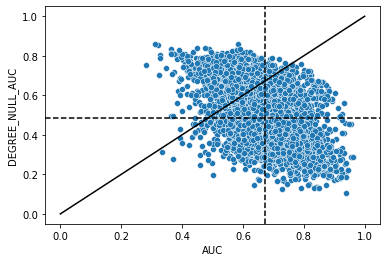

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

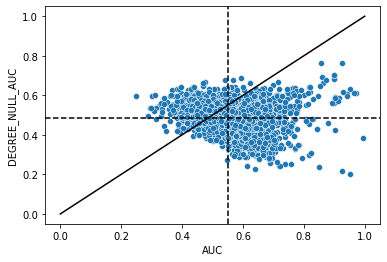

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [38]:
df_2d['AUC'].mean()

0.5513390287307565

In [7]:
chr_list = list(range(1,22)) + ['X']
print (chr_list)
df_list = []

for i in chr_list:
    df_ensg_matrix = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/sequence_proximity_pairs/tss_tss/chr%s_tss_tss.csv' %(i))
    df_ensg_matrix.set_index('Gene stable ID', inplace = True)
    #df_ensg_matrix = df_ensg_matrix.max().max() - df_ensg_matrix
    df_ensg_matrix = 1/df_ensg_matrix
    df_ensg_matrix.replace([np.inf, -np.inf], 2, inplace=True)
    df_list.append(df_ensg_matrix)
#matrix_genome_wide = sparse.block_diag(df_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 'X']


In [8]:
value_list = [x.values for x in df_list]

In [9]:
matrix_genome_wide = sparse.block_diag(value_list)

In [10]:
matrix_genome_wide_array = matrix_genome_wide.toarray()
#matrix_genome_wide_array = matrix_genome_wide_array.max().max() - matrix_genome_wide_array

In [ ]:
matrix_genome_wide_array [matrix_genome_wide_array  == 0] = matrix_genome_wide_array.max().max()

In [182]:
matrix_genome_wide_array = 1/matrix_genome_wide_array
matrix_genome_wide_array.replace([np.inf, -np.inf], 10000000, inplace=True)

array([[    0, 17702, 12134, ...,     0,     0,     0],
       [17702,     0,  5568, ...,     0,     0,     0],
       [12134,  5568,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0, 23660, 16608],
       [    0,     0,     0, ..., 23660,     0,  7052],
       [    0,     0,     0, ..., 16608,  7052,     0]])

In [171]:
matrix_genome_wide_array[matrix_genome_wide_array == 0] = matrix_genome_wide_array.max().max()

In [15]:
df_genome_wide = pd.concat(df_list)

In [16]:
gene_list = df_genome_wide.index.to_list()

In [17]:

matrix_genome_wide_df = pd.DataFrame(matrix_genome_wide_array,
                 index=gene_list,
                 columns=gene_list)

In [372]:
df_2d, go_chrom = run_egad(go_df, matrix_genome_wide_df)   

(18539, 18539)
(18539, 22517)
0.9955612754415568
0.9448032021435686


In [373]:
df_2d.loc['GO:0022836']

AUC                6.309954e-01
AVG_NODE_DEGREE    1.001940e+00
DEGREE_NULL_AUC    4.222863e-01
P_Value            2.901723e-17
Name: GO:0022836, dtype: float64

In [374]:
df_2d.loc['GO:0003723']

AUC                5.708245e-01
AVG_NODE_DEGREE    1.006529e+00
DEGREE_NULL_AUC    5.763490e-01
P_Value            4.479428e-25
Name: GO:0003723, dtype: float64

In [307]:
chr_list = list(range(1,22)) + ['X']
print (chr_list)
df_list = []
go_chrom_list = []
for i in chr_list:
    df_ensg_matrix = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/sequence_proximity_pairs/tss_tss/chr%s_tss_tss.csv' %(i))
    df_ensg_matrix.set_index('Gene stable ID', inplace = True)
    df_ensg_matrix = df_ensg_matrix.max().max() - df_ensg_matrix
    df_2d, go_chrom = run_egad(go_df, df_ensg_matrix)   
    go_chrom_list.append(go_chrom)
    df_2d['chrom'] = i
    df_list.append(df_2d)
    #sns.scatterplot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
    #plt.plot([0, 1], [0, 1], c='black')
    #plt.axvline(x=df_2d['AUC'].mean(),c='black',ls='--')
    #plt.axhline(y=df_2d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
    
    #print ("auc", df_2d.loc['GO:0038023']['AUC'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 'X']
(1968, 1968)
(1968, 22517)
0.9956143569573991
0.0
(1182, 1182)
(1182, 22517)
0.9953496313031996
0.0
(1024, 1024)
(1024, 22517)
0.9951936488264422
0.0
(719, 719)
(719, 22517)
0.9953792291566693
0.0
(847, 847)
(847, 22517)
0.9953613428846283
0.0
(989, 989)
(989, 22517)
0.9953677511290986
0.0
(879, 879)
(879, 22517)
0.9956174687480469
0.0
(650, 650)
(650, 22517)
0.9953979386514804
0.0
(740, 740)
(740, 22517)
0.9954650480297769
0.0
(696, 696)
(696, 22517)
0.995572757543598
0.0
(1255, 1255)
(1255, 22517)
0.9958396020218102
0.0
(994, 994)
(994, 22517)
0.9953802398706312
0.0
(306, 306)
(306, 22517)
0.9954037631988147
0.0
(607, 607)
(607, 22517)
0.9956698285220195
0.0


<ipython-input-6-a09629c0c213>:133: RuntimeWarning: invalid value encountered in true_divide
  roc = (p / n_p - (n_p + 1) / 2) / n_n


(552, 552)
(552, 22517)
0.9954050820217639
0.0
(804, 804)
(804, 22517)
0.9958190240784354
0.0
(1130, 1130)
(1130, 22517)
0.9952042134536698
0.0
(258, 258)
(258, 22517)
0.9952833225404544
0.0
(1389, 1389)
(1389, 22517)
0.996108691639527
0.0
(526, 526)
(526, 22517)
0.9954288023362492
0.0
(227, 227)
(227, 22517)
0.9962667462801967
0.0
(797, 797)
(797, 22517)
0.9961259996559688
0.0


In [151]:

for i, mdf, aucdf in zip(chr_list, go_chrom_list, df_list):
    try :
        print (i, mdf['GO:0038023'].sum(), aucdf.loc['GO:0038023']['AUC'], aucdf.loc['GO:0038023']['DEGREE_NULL_AUC'])
    except KeyError  :
        pass
    

1 184.0 0.6247711755510039 0.4020063608890622
2 75.0 0.5658296197498142 0.5615176151761517
3 94.0 0.550595277392663 0.5941203385952871
4 51.0 0.5002574216646073 0.47384642479746386
5 53.0 0.6099189084075733 0.40468608906420794
6 88.0 0.5386830367914187 0.5402456866108364
7 63.0 0.6586701603062367 0.4392896047307812
8 31.0 0.6182821755519655 0.5358799312105894
9 58.0 0.5693661177532147 0.6469814945899485
10 33.0 0.37155386371072646 0.48663101604278075
11 225.0 0.6248575477626387 0.4470916936353829
12 95.0 0.6440388653197783 0.49261752824776067
14 44.0 0.7033929756842724 0.2528257710318101
15 32.0 0.56632511007511 0.32247596153846153
16 24.0 0.5859864672364673 0.5857905982905983
17 60.0 0.5832496468721581 0.3846728971962617
19 96.0 0.5733656390923972 0.45472818381026037
20 23.0 0.5189784370698883 0.3695219984441179
X 55.0 0.3900943396226415 0.4146532712570449


In [147]:
mdf['GO:0097159'].sum()

264.0

In [159]:
df_all_chrom.loc['GO:0031424']

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC       P_Value chrom
GO:0031424  0.919257     3.450987e+11         0.776369  8.974435e-20     1
GO:0031424  0.979290     9.888396e+10         0.822726  3.786595e-19    12
GO:0031424  0.991707     7.052984e+10         0.985010  1.562711e-36    17
GO:0031424  0.862039     7.375591e+09         0.488645  3.560072e-16    21

In [152]:
df_all_chrom = pd.concat(df_list)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

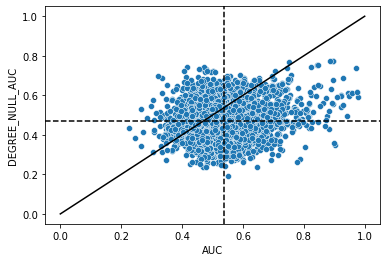

In [382]:
sns.scatterplot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

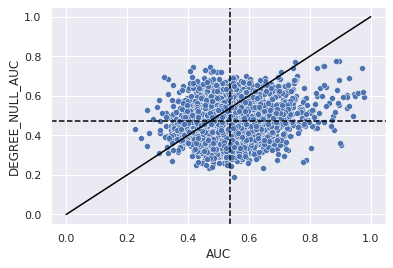

In [920]:
sns.scatterplot(data=df_2d, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')


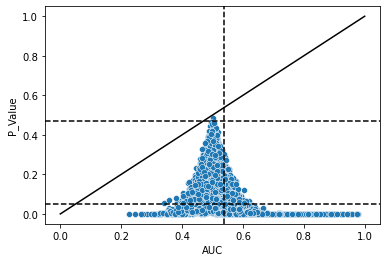

In [381]:
sns.scatterplot(data=df_2d, x='AUC', y='P_Value')
plt.plot([0, 1], [0, 1], c='black')
plt.axhline(y=.05,c='black',ls='--')
plt.axvline(x=df_2d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [22]:
sns.scatterplot(data=df_all_chrom, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_all_chrom['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_all_chrom['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

NameError: name 'df_all_chrom' is not defined

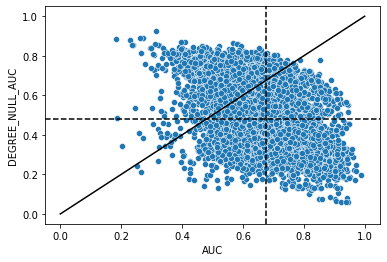

In [39]:
sns.scatterplot(data=df, x='AUC', y='DEGREE_NULL_AUC')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [43]:
df.loc['GO:0004930']

AUC                6.551153e-01
AVG_NODE_DEGREE    7.053730e+03
DEGREE_NULL_AUC    2.169898e-01
P_Value            3.894689e-23
Name: GO:0004930, dtype: float64

In [ ]:
ax.scatter(x=df['AUC'].values,y=df['DEGREE_NULL_AUC'].values)

In [797]:
df_2d

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC   P_Value
GO:0000003  0.520860         1.005609         0.461559  0.004246
GO:0000018  0.556375         1.002909         0.555114  0.019362
GO:0000027  0.414948         1.002735         0.658462  0.067223
GO:0000030  0.541233         1.007402         0.562222  0.245723
GO:0000038  0.620817         1.000906         0.435287  0.011248
...              ...              ...              ...       ...
GO:2001251  0.540963         1.003115         0.540945  0.049829
GO:2001252  0.498730         1.002965         0.530397  0.159600
GO:2001257  0.507500         1.000731         0.425452  0.031217
GO:2001258  0.475821         1.000702         0.459655  0.194238
GO:2001259  0.549055         1.000916         0.437854  0.091323

[5803 rows x 4 columns]

In [41]:
df_id_scores = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software_v2_cis/agg_id_auc', sep='\t', names=['id', 'score'])



In [48]:
df_id_scores.set_index('id', inplace=True)

In [356]:
#import bottleneck
import scipy.stats as stats
import numpy as np
import pandas as pd

def prec_recall (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    df_trial = df_trial.reset_index()
    #df_trial['true_neg'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
    #df_trial['true_pos'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
    df_trial['true_pos_cum'] = df_trial['true_pos'].cumsum()
    df_trial['true_neg_cum'] = df_trial['true_neg'].cumsum()
    df_trial['PPV'] = df_trial['true_pos_cum'] / (df_trial['true_pos_cum'] + df_trial['true_neg_cum'] )
    df_trial['recall'] = df_trial['true_pos_cum']  / (df_trial['true_pos'].sum())
    #df_trial['recall'] = df_trial['recall'].round(1)
    #df_trial['f-score'] = (2 * df_trial['PPV'] * df_trial['recall']) / (df_trial['PPV'] + df_trial['recall'])
    #df_trial.iloc[df_trial['f-score'].idxmax()]
    return list(zip(df_trial['recall'].tolist(), df_trial['PPV'].tolist()))



def calc_auroc (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, df_trial[predicted_score].values)
    df_trial['p'] = [y if x==1 else 0 for x,y in zip(df_trial['true_pos'], predicts2)]
    #print (df_trial['p'].sum())
    if df_trial['true_neg'].sum() == 0 or df_trial['true_pos'].sum() == 0:
        return np.nan, np.nan
        
    else:
        roc = (((df_trial['p'].sum() /df_trial['true_pos'].sum() )- (df_trial['true_pos'].sum() + 1)/2)) / df_trial['true_neg'].sum()
        U = roc * df_trial['true_pos'].sum() * df_trial['true_neg'].sum()
        Z = (np.abs(U - (df_trial['true_pos'].sum() * df_trial['true_neg'].sum() / 2))) / np.sqrt(df_trial['true_pos'].sum() * df_trial['true_neg'].sum() *
                                                (df_trial['true_pos'].sum() + df_trial['true_neg'].sum() + 1) / 12)
        P = stats.norm.sf(Z)
        return roc, P

In [766]:
stats.norm.sf(.2)

0.42074029056089696

In [357]:
auc_dict = []
p_val_dict = []
for go_id in GO_groups:
    df = pd.DataFrame(columns = ['predicted_score', 'true_pos', 'true_neg'])   

    df['predicted_score'] = go_df_scores['score'].tolist()

    df['true_pos'] = go_df_scores[go_id].values

    df['true_neg'] = [0 if x==1 else 1 for x in df['true_pos']]

    calculated_auc, p_val = calc_auroc(df,predicted_score='predicted_score')
    auc_dict.append(calculated_auc)
    p_val_dict.append(p_val)

In [909]:
from scipy.stats import mannwhitneyu
z_list = []
z_p_dict = []
for go_id in GO_groups:
#for go_id in ['GO:2001260']:
    df = pd.DataFrame(columns = ['predicted_score', 'true_pos', 'true_neg'])   

    df['predicted_score'] = go_df_scores['score'].tolist()

    t_p_scores = go_df_scores[go_df_scores[go_id] ==1 ]['score'].tolist()

    t_n_scores = go_df_scores[go_df_scores[go_id] ==0 ]['score'].tolist()

    U1, p_val = mannwhitneyu(t_p_scores, t_n_scores, use_continuity=False, alternative='less')
    nx, ny = len(t_p_scores), len(t_n_scores)
    N = nx + ny
    z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
    p = stats.norm.sf(z)
    z_list.append(calculated_auc)
    z_p_dict.append(p)

/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
<ipython-input-909-93cad3a31fb5>:17: RuntimeWarning: invalid value encountered in double_scalars
  z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
<ipython-input-909-93cad3a31fb5>:17: RuntimeWarning: invalid value encountered in double_scalars
  z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
/home/lohia/miniconda3/envs/hicexplorer/lib/python3.8/site-packages/scipy/stats/stats.py:7171: RuntimeWarning: invalid value encountered in double_scalars
  z = (bigu - meanrank) / sd
<ipython-input-909-93cad3a31fb5>:17: RuntimeWarning: invalid value encountered in double_scalars
  z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
/

KeyboardInterrupt: 

In [885]:
males = go_df_scores[go_df_scores[go_id] ==1 ]['score'].tolist()
females = go_df_scores[go_df_scores[go_id] ==0 ]['score'].tolist()
U1, p = mannwhitneyu(males, females)

In [906]:
go_df_scores

GO:0000002  GO:0000003  GO:0000009  GO:0000010  GO:0000012  \
key_0                                                                         
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         0.0         0.0   

                 GO:0000014  GO:0000015  GO:0000016  GO:0000018  GO:0000019  \
key_0                                                                         
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         1.0         0.0   

                 ...  GO:2001302  GO:2001303  GO:2001304  GO:2001306  \
key_0            ...                                                   
ENSG00000121410  ...         0.0         0.0         0.0         0.0   
ENSG00000175899  ...         0.0         0.0         0.0         0.0   
ENSG00000171428  ...         0.0         0.0         0.0         0.0   
ENSG00000196136  ...         0.0         0.0         0.0         0.0   
ENSG00000114771  ...         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
ENSG00000284753  ...         0.0         0.0         0.0         0.0   
ENSG00000267221  ...         0.0         0.0         0.0         0.0   
ENSG00000283288  ...         0.0         0.0         0.0         0.0   
ENSG00000273238  ...         0.0         0.0         0.0         0.0   
ENSG00000253251  ...         0.0         0.0         0.0         0.0   

                 GO:2001311  GO:0003674  GO:0005575  GO:0008150     score  \
key_0                                                                       
ENSG00000121410         0.0         1.0         1.0         1.0  0.817715   
ENSG00000175899         0.0         1.0         1.0         1.0  0.435028   
ENSG00000171428         0.0         1.0         1.0         1.0  0.437154   
ENSG00000196136         0.0         1.0         1.0         1.0  0.454531   
ENSG00000114771         0.0         1.0         1.0         1.0  0.591129   
...                     ...         ...         ...         ...       ...   
ENSG00000284753         0.0         1.0         0.0         1.0  0.815555   
ENSG00000267221         0.0         0.0         1.0         0.0  0.764673   
ENSG00000283288         0.0         0.0         1.0         0.0  0.771531   
ENSG00000273238         0.0         0.0         1.0         0.0  0.413740   
ENSG00000253251         0.0         1.0         1.0         1.0  0.694408   

                  rank

In [877]:
U1

4622298.0

In [903]:
U1, p = mannwhitneyu(females,males )

In [879]:
U1

4622298.0

In [886]:
nx, ny = len(males), len(females)
U2 = nx*ny - U1
print(U2)

39939.0


In [904]:
p

0.017098012913712518

In [899]:
N = nx + ny
z = (U1 - nx*ny/2) / np.sqrt(nx*ny * (N + 1)/ 12)
p = stats.norm.sf(z)

In [900]:
p

0.9829047011526576

In [910]:
auc_GO_terms_manw = pd.DataFrame(list(zip(GO_groups, z_list, z_p_dict )), columns=['id','AUC_agg', 'P_val_agg'])

In [911]:
auc_GO_terms_manw

id  AUC_agg  P_val_agg
0     GO:0000002   6882.0   0.080055
1     GO:0000003   6882.0   0.999992
2     GO:0000009   6882.0   0.813801
3     GO:0000010   6882.0   0.152899
4     GO:0000012   6882.0   0.852567
...          ...      ...        ...
6644  GO:0019677   6882.0   0.619779
6645  GO:0019682   6882.0   0.156701
6646  GO:0019692   6882.0   0.196859
6647  GO:0019693   6882.0   0.629035
6648  GO:0019694   6882.0   0.537917

[6649 rows x 3 columns]

In [815]:
auc_GO_terms_manw

id  AUC_agg  P_val_agg
0  GO:0000002  16253.0    0.04846

In [385]:
auc_GO_terms = pd.DataFrame(list(zip(GO_groups, auc_dict, p_val_dict )), columns=['id','AUC_agg', 'P_val_agg'])

In [912]:
auc_GO_terms

id   AUC_agg     P_val_agg
0      GO:0000002  0.598406  8.005451e-02
1      GO:0000003  0.461644  7.832246e-06
2      GO:0000009  0.242488  1.861993e-01
3      GO:0000010  0.709059  1.528988e-01
4      GO:0000012  0.393059  1.474332e-01
...           ...       ...           ...
22512  GO:2001306  0.177526  1.319946e-01
22513  GO:2001311  0.375320  2.706844e-01
22514  GO:0003674  0.545226  1.635639e-07
22515  GO:0005575  0.496849  4.011789e-01
22516  GO:0008150  0.522923  3.133483e-03

[22517 rows x 3 columns]

In [368]:
auc_GO_terms[auc_GO_terms['P_val'] < 0.05]

id       AUC         P_val
1      GO:0000003  0.461644  7.832246e-06
6      GO:0000015  0.739635  4.845956e-02
12     GO:0000026  0.844343  1.942390e-02
15     GO:0000030  0.594459  4.182858e-02
22     GO:0000045  0.641528  1.101366e-04
...           ...       ...           ...
22488  GO:2001259  0.410565  6.692925e-03
22489  GO:2001260  0.146985  1.709530e-02
22490  GO:2001262  0.005638  4.341045e-02
22514  GO:0003674  0.545226  1.635639e-07
22516  GO:0008150  0.522923  3.133483e-03

[3670 rows x 3 columns]

In [349]:
auc_GO_terms[auc_GO_terms['AUC'] < 0.1]

id       AUC
18     GO:0000035  0.045390
19     GO:0000036  0.045390
72     GO:0000150  0.009001
330    GO:0000831  0.002947
517    GO:0001591  0.008905
...           ...       ...
22397  GO:2001112  0.006983
22398  GO:2001113  0.006983
22453  GO:2001213  0.060606
22490  GO:2001262  0.005638
22505  GO:2001294  0.055032

[600 rows x 2 columns]

In [809]:
auc_GO_terms[auc_GO_terms['id'] == 'GO:0003723']

id   AUC_agg     P_val_agg
1614  GO:0003723  0.547658  3.902596e-10

In [384]:
auc_GO_terms

id       AUC         P_val
0      GO:0000002  0.598406  8.005451e-02
1      GO:0000003  0.461644  7.832246e-06
2      GO:0000009  0.242488  1.861993e-01
3      GO:0000010  0.709059  1.528988e-01
4      GO:0000012  0.393059  1.474332e-01
...           ...       ...           ...
22512  GO:2001306  0.177526  1.319946e-01
22513  GO:2001311  0.375320  2.706844e-01
22514  GO:0003674  0.545226  1.635639e-07
22515  GO:0005575  0.496849  4.011789e-01
22516  GO:0008150  0.522923  3.133483e-03

[22517 rows x 3 columns]

In [652]:
df_2d_vs3d = df_2d.merge(auc_GO_terms, left_on=df_2d.index, right_on='id')

In [388]:
df_2d_vs3d

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC   P_Value          id  \
0     0.520860         1.005609         0.461559  0.004246  GO:0000003   
1     0.556375         1.002909         0.555114  0.019362  GO:0000018   
2     0.414948         1.002735         0.658462  0.067223  GO:0000027   
3     0.541233         1.007402         0.562222  0.245723  GO:0000030   
4     0.620817         1.000906         0.435287  0.011248  GO:0000038   
...        ...              ...              ...       ...         ...   
5798  0.540963         1.003115         0.540945  0.049829  GO:2001251   
5799  0.498730         1.002965         0.530397  0.159600  GO:2001252   
5800  0.507500         1.000731         0.425452  0.031217  GO:2001257   
5801  0.475821         1.000702         0.459655  0.194238  GO:2001258   
5802  0.549055         1.000916         0.437854  0.091323  GO:2001259   

       AUC_agg  P_val_agg  
0     0.461644   0.000008  
1     0.547855   0.054540  
2     0.567056   0.113925  
3     0.594459   0.041829  
4     0.461840   0.234743  
...        ...        ...  
5798  0.586205   0.000534  
5799  0.552805   0.009900  
5800  0.428475   0.000972  
5801  0.489198   0.408898  
5802  0.410565   0.006693  

[5803 rows x 7 columns]

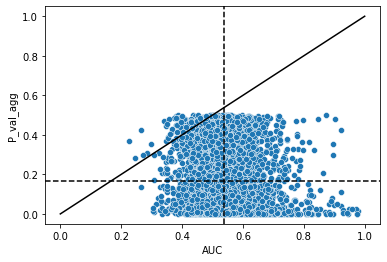

In [393]:
sns.scatterplot(data=df_2d_vs3d, x='AUC', y='P_val_agg')
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_vs3d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_vs3d['P_val_agg'].mean(), c='black', ls='--')

In [ ]:
sns.scatterplot(data=df_2d_vs3d[df_2d_vs3d['AUC_agg']>.5], x='AUC', y='DEGREE_NULL_AUC', hue="P_val_agg", alpha=0.3)
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_vs3d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_vs3d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [463]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = df_2d_vs3d
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['AUC']
y = df['DEGREE_NULL_AUC']
z = df['P_val_agg']

ax = sns.heatmap(df_2d_vs3d_table.T, vmin=0.1, vmax=0.9, cmap=sns.diverging_palette(240, 10, n=9))
ax.invert_yaxis()

#ax.set_xlabel("AUC")
#ax.set_ylabel("DEGREE_NULL_AUC")
#ax.set_zlabel("P_val_agg")

#ax.scatter(x, y, z)

plt.show()

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

<Figure size 432x288 with 2 Axes>

<AxesSubplot:xlabel='DEGREE_NULL_AUC', ylabel='AVG_NODE_DEGREE'>

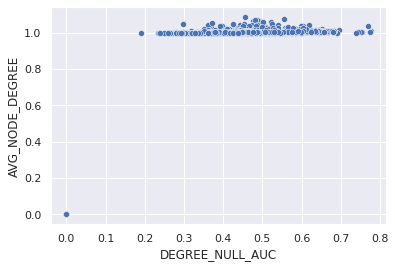

In [491]:
sns.scatterplot(data=df_2d_vs3d[df_2d_vs3d['P_val_agg']<0.05], x='DEGREE_NULL_AUC', y='AVG_NODE_DEGREE')
#plt.plot([0, 1], [0, 1], c='black')
#plt.axvline(x=df_2d_vs3d['AUC'].mean(),c='black',ls='--')
#plt.axhline(y=df_2d_vs3d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

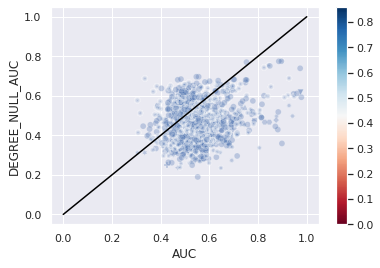

In [666]:
#df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 0, 'P_Value':0, 'AUC_agg' : 0, 'P_val_agg':0}

#df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
#df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 0, 'P_Value':0, 'AUC_agg' : 0, 'P_val_agg':0}
#df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
ax = sns.scatterplot(data=df_2d_vs3d_sig, x='AUC', y='DEGREE_NULL_AUC', style="AUC_agg", alpha=0.3, palette='RdBu')
norm = plt.Normalize(df_2d_vs3d[df_2d_vs3d['P_val_agg']<.05]['AUC_agg'].min(), df_2d_vs3d[df_2d_vs3d['P_val_agg']<.05]['AUC_agg'].max())
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.plot([0, 1], [0, 1], c='black')
#plt.axvline(x=df_2d_vs3d['AUC'].mean(),c='black',ls='--')
#plt.axhline(y=df_2d_vs3d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

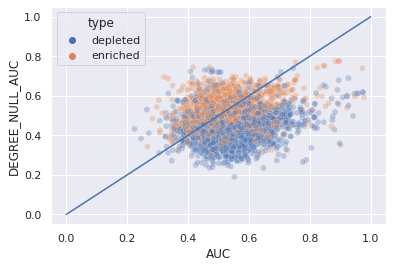

In [700]:
#df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 0, 'P_Value':0, 'AUC_agg' : 0, 'P_val_agg':0}

#df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
#df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 0, 'P_Value':0, 'AUC_agg' : 0, 'P_val_agg':0}
#df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
ax = sns.scatterplot(data=df_2d_vs3d, x='AUC', y='DEGREE_NULL_AUC', hue="type", alpha=0.3)
#norm = plt.Normalize(df_2d_vs3d_sig[df_2d_vs3d_sig['P_val_agg']<.05]['AUC_agg'].min(), df_2d_vs3d_sig[df_2d_vs3d_sig['P_val_agg']<.05]['AUC_agg'].max())
#sm = plt.cm.ScalarMappable(cmap='hot', norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(sm)
plt.plot([0, 1], [0, 1])
#plt.axvline(x=df_2d_vs3d_sig['AUC'].mean(),c='black',ls='--')
#plt.axhline(y=df_2d_vs3d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

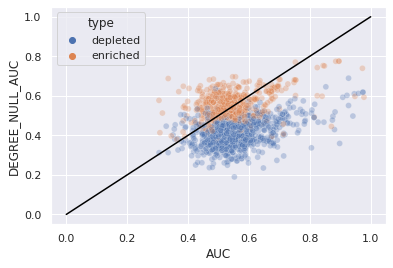

In [703]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt



ax = sns.scatterplot(data=df_2d_vs3d_sig, x='AUC', y='DEGREE_NULL_AUC', hue="type", alpha=0.3)
#norm = plt.Normalize(df_2d_vs3d_sig[df_2d_vs3d_sig['P_val_agg']<.05]['AUC_agg'].min(), df_2d_vs3d_sig[df_2d_vs3d_sig['P_val_agg']<.05]['AUC_agg'].max())
#sm = plt.cm.ScalarMappable(cmap='hot', norm=norm)
#sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(sm)
plt.plot([0, 1], [0, 1], c='black')
figname = '/sonas-hs/gillis/hpc/data/lohia/figures/2D_vs_3D.pdf' 
#savefig('sample.pdf')
plt.savefig(figname, bbox_inches='tight', dpi=300)

In [708]:
df_2d_vs3d

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC   P_Value          id  \
0     0.520860         1.005609         0.461559  0.004246  GO:0000003   
1     0.556375         1.002909         0.555114  0.019362  GO:0000018   
2     0.414948         1.002735         0.658462  0.067223  GO:0000027   
3     0.541233         1.007402         0.562222  0.245723  GO:0000030   
4     0.620817         1.000906         0.435287  0.011248  GO:0000038   
...        ...              ...              ...       ...         ...   
5800  0.507500         1.000731         0.425452  0.031217  GO:2001257   
5801  0.475821         1.000702         0.459655  0.194238  GO:2001258   
5802  0.549055         1.000916         0.437854  0.091323  GO:2001259   
5803       NaN         0.000000         0.000000  0.000000         NaN   
5804       NaN         0.000000         0.000000  0.000000         NaN   

       AUC_agg  P_val_agg                                     description  \
0     0.461644   0.000008                                    reproduction   
1     0.547855   0.054540                 regulation of DNA recombination   
2     0.567056   0.113925                ribosomal large subunit assembly   
3     0.594459   0.041829                    mannosyltransferase activity   
4     0.461840   0.234743    very long-chain fatty acid metabolic process   
...        ...        ...                                             ...   
5800  0.428475   0.000972           regulation of cation channel activity   
5801  0.489198   0.408898  negative regulation of cation channel activity   
5802  0.410565   0.006693  positive regulation of cation channel activity   
5803  0.000000   0.000000                                             NaN   
5804  0.000000   0.000000                                             NaN   

          type  
0     depleted  
1     enriched  
2     enriched  
3     enriched  
4     depleted  
...        ...  
5800  depleted  
5801  depleted  
5802  depleted  
5803  depleted  
5804  depleted  

[5805 rows x 9 columns]

In [914]:
df_2d_vs3d = df_2d.merge(auc_GO_terms_manw, left_on=df_2d.index, right_on='id')

In [921]:
df_2d_vs3d

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC       P_Value          id  \
0     0.520860         1.005609         0.461559  4.245745e-03  GO:0000003   
1     0.556375         1.002909         0.555114  1.936217e-02  GO:0000018   
2     0.414948         1.002735         0.658462  6.722317e-02  GO:0000027   
3     0.541233         1.007402         0.562222  2.457225e-01  GO:0000030   
4     0.620817         1.000906         0.435287  1.124839e-02  GO:0000038   
...        ...              ...              ...           ...         ...   
1976  0.824401         1.000235         0.436574  7.555911e-08  GO:0019585   
1977  0.536178         1.006799         0.500671  1.584249e-04  GO:0019637   
1978  0.494602         1.002121         0.530006  3.612635e-01  GO:0019674   
1979  0.532013         1.003902         0.557671  2.666583e-01  GO:0019692   
1980  0.501138         1.001585         0.490822  3.967337e-02  GO:0019693   

      AUC_agg  P_val_agg  log(P_value enrichment)  
0      6882.0   0.999992                -0.000011  
1      6882.0   0.054540                -4.196540  
2      6882.0   0.113925                -3.133845  
3      6882.0   0.041829                -4.579367  
4      6882.0   0.765257                -0.385983  
...       ...        ...                      ...  
1976   6882.0   0.905831                -0.142687  
1977   6882.0   0.577520                -0.792057  
1978   6882.0   0.321627                -1.636539  
1979   6882.0   0.196859                -2.344762  
1980   6882.0   0.629035                -0.668787  

[1981 rows x 8 columns]

In [915]:
df_2d_vs3d['log(P_value enrichment)'] = [np.log2(x) for x in df_2d_vs3d['P_val_agg']]

In [768]:
df_2d_vs3d['log(P_value depletion)'] = [np.log2(1-x) for x in df_2d_vs3d['P_val_agg']]

In [714]:
df_2d_vs3d_sig['log(P_value enrichment)'] = [np.log2(x) for x in df_2d_vs3d_sig['P_val_agg']]

In [784]:
df_2d_vs3d['del'] =  1-df_2d_vs3d['P_val_agg']

In [788]:
df_2d_vs3d['del'].min()

0.5002084919607315

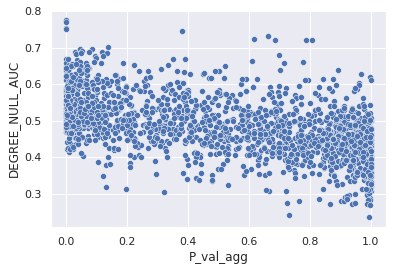

In [922]:
ax = sns.scatterplot(data=df_2d_vs3d, x='P_val_agg', y='DEGREE_NULL_AUC')

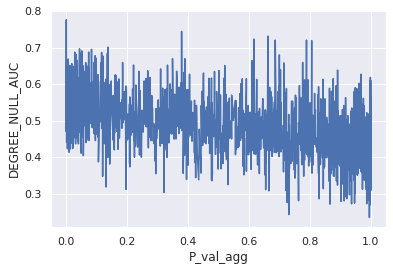

In [926]:
ax = sns.lineplot(data=df_2d_vs3d, x='P_val_agg', y='DEGREE_NULL_AUC')

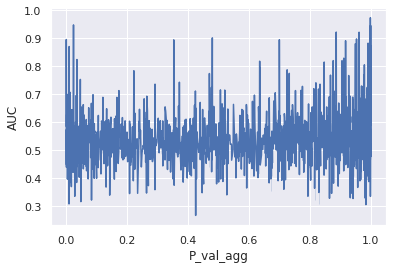

In [925]:
ax = sns.lineplot(data=df_2d_vs3d, x='P_val_agg', y='AUC', ci='sd')

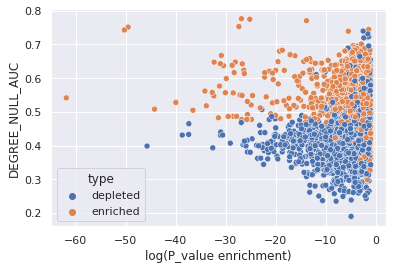

In [776]:
ax = sns.scatterplot(data=df_2d_vs3d, x='log(P_value enrichment)', y='DEGREE_NULL_AUC', hue='type')

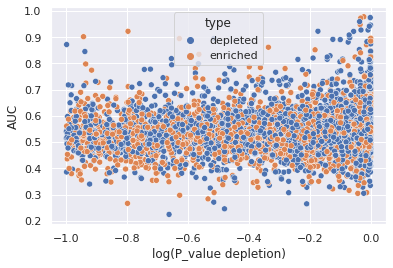

In [770]:
ax = sns.scatterplot(data=df_2d_vs3d, x='log(P_value depletion)', y='AUC', hue='type')

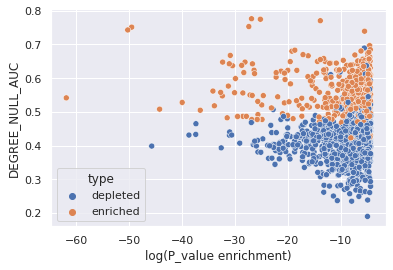

In [755]:
ax = sns.scatterplot(data=df_2d_vs3d_sig, x='log(P_value enrichment)', y='DEGREE_NULL_AUC', hue='type')

In [767]:
df_2d_vs3d_sig[P_val_agg] =  1- df_2d_vs3d_sig['P_val_agg]

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC   P_Value          id  \
0     0.520860         1.005609         0.461559  0.004246  GO:0000003   
3     0.541233         1.007402         0.562222  0.245723  GO:0000030   
6     0.513166         1.001226         0.480032  0.127785  GO:0000045   
7     0.481002         1.010726         0.648393  0.195597  GO:0000049   
17    0.500637         1.001714         0.499080  0.098281  GO:0000118   
...        ...              ...              ...       ...         ...   
5799  0.498730         1.002965         0.530397  0.159600  GO:2001252   
5800  0.507500         1.000731         0.425452  0.031217  GO:2001257   
5802  0.549055         1.000916         0.437854  0.091323  GO:2001259   
5803       NaN         0.000000         0.000000  0.000000         NaN   
5804       NaN         0.000000         0.000000  0.000000         NaN   

       AUC_agg  P_val_agg                                     description  \
0     0.461644   0.000008                                    reproduction   
3     0.594459   0.041829                    mannosyltransferase activity   
6     0.641528   0.000110                          autophagosome assembly   
7     0.574799   0.021707                                    tRNA binding   
17    0.559490   0.044980                     histone deacetylase complex   
...        ...        ...                                             ...   
5799  0.552805   0.009900  positive regulation of chromosome organization   
5800  0.428475   0.000972           regulation of cation channel activity   
5802  0.410565   0.006693  positive regulation of cation channel activity   
5803  0.000000   0.000000                                          np.nan   
5804  0.000000   0.000000                                          np.nan   

          type  log(P_value enrichment)      diff            type_def  
0     depleted               -16.962142 -0.059301  biological_process  
3     enriched                -4.579367  0.020989  molecular_function  
6     enriched               -13.148418 -0.033134  biological_process  
7     enriched                -5.525681  0.167390  molecular_function  
17    enriched                -4.474560 -0.001558  cellular_component  
...        ...                      ...       ...                 ...  
5799  enriched                -6.658365  0.031668  biological_process  
5800  depleted               -10.006056 -0.082048  biological_process  
5802  depleted                -7.223147 -0.111200  biological_process  
5803  depleted                     -inf       NaN              np.nan  
5804  depleted                     -inf       NaN              np.nan  

[1961 rows x 12 columns]

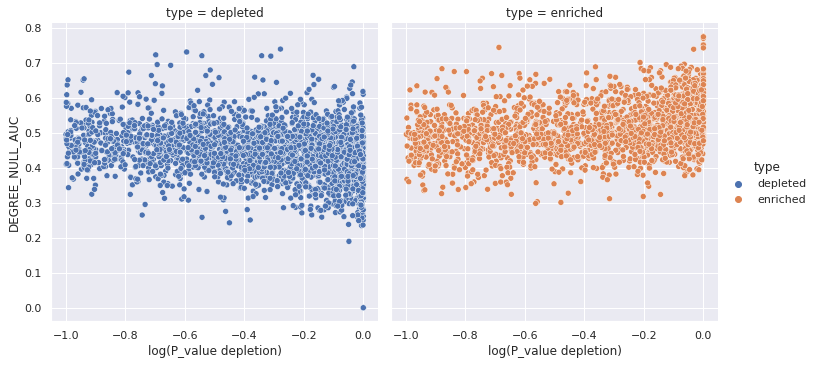

In [772]:
sns.relplot(
    data=df_2d_vs3d, x='log(P_value depletion)', y='DEGREE_NULL_AUC',
    col="type", hue="type", 
    kind="scatter"
)

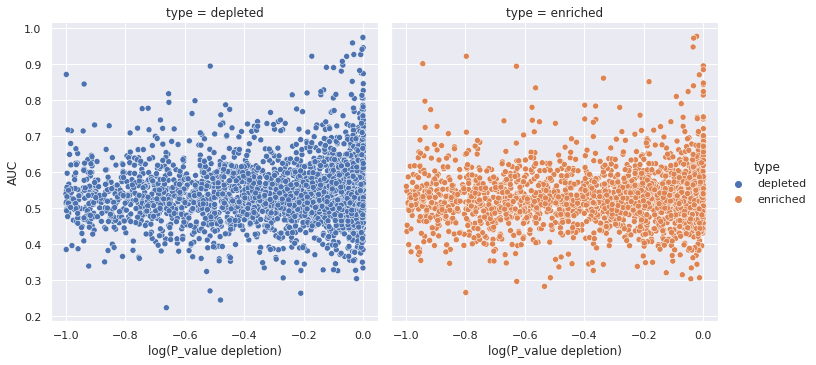

In [773]:
sns.relplot(
    data=df_2d_vs3d, x='log(P_value depletion)', y='AUC',
    col="type", hue="type", 
    kind="scatter"
)

In [ ]:
sns.relplot(
    data=df_2d_vs3d_sig, x='log(P_value enrichment)', y='AUC',
    col="type", hue="type", 
    kind="scatter"
)

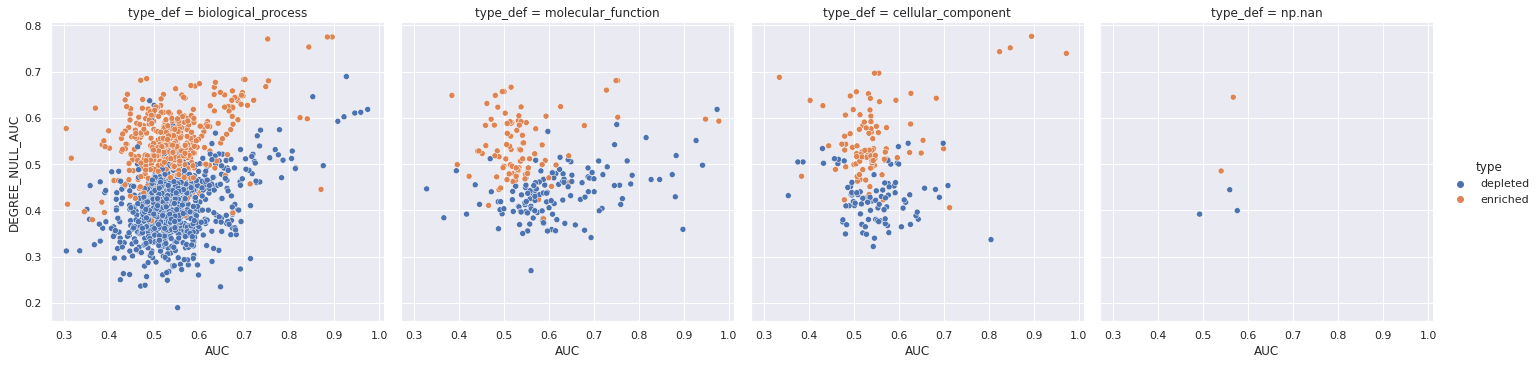

In [754]:
sns.relplot(
    data=df_2d_vs3d_sig, x='AUC', y='DEGREE_NULL_AUC',
    col="type_def", hue="type", 
    kind="scatter"
)

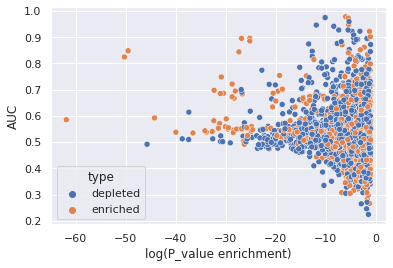

In [757]:
ax = sns.scatterplot(data=df_2d_vs3d, x='log(P_value enrichment)', y='AUC',  hue='type')

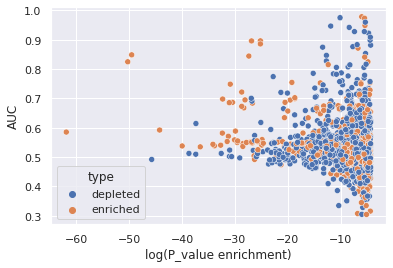

In [758]:
ax = sns.scatterplot(data=df_2d_vs3d_sig, x='log(P_value enrichment)', y='AUC',  hue='type')

In [759]:
df_2d_vs3d['diff'] =   df_2d_vs3d['DEGREE_NULL_AUC'] - df_2d_vs3d['AUC']

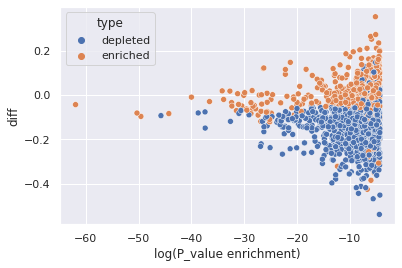

In [761]:
ax = sns.scatterplot(data=df_2d_vs3d_sig, x='log(P_value enrichment)', y='diff', hue='type')

In [774]:
df_2d_vs3d['type in Hi-C'] = ['enriched in Hi-C' if x>0.5 else 'depleted in Hi-C'  for x in df_2d_vs3d['AUC_agg'] ]

In [749]:
df_2d_vs3d_sig['type'] = ['enriched' if x>0.5 else 'depleted'  for x in df_2d_vs3d_sig['AUC_agg'] ]

<ipython-input-749-00487391924c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2d_vs3d_sig['type'] = ['enriched' if x>0.5 else 'depleted'  for x in df_2d_vs3d_sig['AUC_agg'] ]


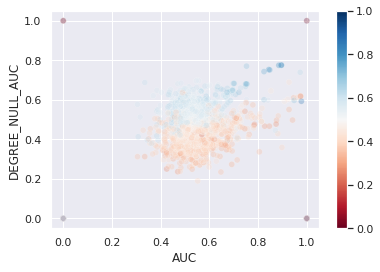

In [651]:
df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 0, 'P_Value':0, 'AUC_agg' : 0.5, 'P_val_agg':0, 'AUC': 1}

df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 0, 'P_Value':0, 'AUC_agg' : 0.5, 'P_val_agg':0, 'AUC': 0}
df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
#df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 0, 'P_Value':0, 'AUC_agg' : 0.5, 'P_val_agg':0, 'AUC': 0}

#df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
#df2 = {'AVG_NODE_DEGREE' : 0, 'DEGREE_NULL_AUC' : 1, 'P_Value':0, 'AUC_agg' : 0.5, 'P_val_agg':0, 'AUC': 0}
#df_2d_vs3d = df_2d_vs3d.append(df2, ignore_index = True)
ax = sns.scatterplot(data=df_2d_vs3d[df_2d_vs3d['P_val_agg']<0.05], x='AUC', y='DEGREE_NULL_AUC', hue="AUC_agg", alpha=0.3, palette='RdBu')
#norm = plt.Normalize(df_2d_vs3d[df_2d_vs3d['P_val_agg']<.05]['AUC_agg'].min(), df_2d_vs3d[df_2d_vs3d['P_val_agg']<.05]['AUC_agg'].max())
#sm = plt.cm.ScalarMappable(mpl.cm.viridis, norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)


In [516]:
from os.path import exists
from goatools.obo_parser import GODag

if not exists('go-basic.obo'):
    !wget http://geneontology.org/ontology/go-basic.obo
dag = GODag('go-basic.obo', optional_attrs=['def'])

--2021-07-14 16:20:44--  http://geneontology.org/ontology/go-basic.obo
Resolving geneontology.org (geneontology.org)... 34.233.67.155
Connecting to geneontology.org (geneontology.org)|34.233.67.155|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://purl.obolibrary.org/obo/go/go-basic.obo [following]
--2021-07-14 16:20:44--  http://purl.obolibrary.org/obo/go/go-basic.obo
Resolving purl.obolibrary.org (purl.obolibrary.org)... 52.3.123.63
Connecting to purl.obolibrary.org (purl.obolibrary.org)|52.3.123.63|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://current.geneontology.org/ontology/go-basic.obo [following]
--2021-07-14 16:20:45--  http://current.geneontology.org/ontology/go-basic.obo
Resolving current.geneontology.org (current.geneontology.org)... 13.224.215.44, 13.224.215.108, 13.224.215.22, ...
Connecting to current.geneontology.org (current.geneontology.org)|13.224.215.44|:80... connected.
HTTP request sent, awa

In [517]:
term = next(iter(dag.values()))

In [522]:

pattern = '{ID} {NAME}\n'
#print(pattern.format(ID=term.item_id, NAME=term.name, DEF=term.defn))
term1 = dag['GO:0000001']
print(pattern.format(ID=term1.item_id, NAME=term1.name))

GO:0000001 mitochondrion inheritance



In [855]:
dag['GO:0000001']

GOTerm('GO:0000001'):
  id:GO:0000001
  item_id:GO:0000001
  name:mitochondrion inheritance
  namespace:biological_process
  _parents: 2 items
    GO:0048311
    GO:0048308
  parents: 2 items
    GO:0048308	level-05	depth-05	organelle inheritance [biological_process]
    GO:0048311	level-05	depth-06	mitochondrion distribution [biological_process]
  children: 0 items
  level:6
  depth:7
  is_obsolete:False
  alt_ids: 0 items
  defn:"The distribution of mitochondria, including the mitochondrial genome, into daughter cells after mitosis or meiosis, mediated by interactions between mitochondria and the cytoskeleton." [GOC:mcc, PMID:10873824, PMID:11389764]

In [740]:
term_def = []
type_def = []
for x in  df_2d_vs3d['id']:
    try:
        term_def.append(dag[x].name)
        type_def.append(dag[x].namespace)
    except KeyError :
        term_def.append("np.nan")
        type_def.append("np.nan")
        

In [856]:
term_def = []
type_def = []
for x in GO_groups:
    try:
        term_def.append(dag[x].name)
        type_def.append(dag[x].namespace)
    except KeyError :
        term_def.append("np.nan")
        type_def.append("np.nan")

In [858]:
type_def

['biological_process',
 'biological_process',
 'molecular_function',
 'molecular_function',
 'biological_process',
 'molecular_function',
 'cellular_component',
 'molecular_function',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'molecular_function',
 'biological_process',
 'biological_process',
 'molecular_function',
 'biological_process',
 'molecular_function',
 'molecular_function',
 'molecular_function',
 'biological_process',
 'biological_process',
 'biological_process',
 'molecular_function',
 'molecular_function',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'molecular_function',
 'molecular_function',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'biological_process',
 'molecular_function',
 'biological_process',
 'biologica

In [542]:
import collections as cx
word2cnt = cx.Counter([word for name in df_2d_vs3d['description'].tolist() for word in name.split()])

In [742]:
df_2d_vs3d['description'] = term_def 

In [745]:
df_2d_vs3d['type_def'] = type_def 

In [746]:
df_2d_vs3d_sig = df_2d_vs3d[df_2d_vs3d['P_val_agg'] < 0.05]

In [657]:
df_2d_vs3d_sig.dropna(inplace=True)

<ipython-input-657-a830de154037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2d_vs3d_sig.dropna(inplace=True)


In [633]:
df_2d_vs3d_sig_positive = df_2d_vs3d_sig[df_2d_vs3d_sig['AUC_agg'] > 0.55]

In [635]:
df_2d_vs3d_sig_negative = df_2d_vs3d_sig[df_2d_vs3d_sig['AUC_agg'] < 0.45]

In [634]:
df_2d_vs3d_sig_positive[df_2d_vs3d_sig_positive['type'] == 'molecular_function' ]['description'].tolist()

['mannosyltransferase activity',
 'tRNA binding',
 "3'-5'-exoribonuclease activity",
 'DNA secondary structure binding',
 'RNA polymerase II complex binding',
 'ATPase activator activity',
 'DNA binding',
 'DNA helicase activity',
 'translation initiation factor activity',
 'antigen binding',
 "DNA-directed 5'-3' RNA polymerase activity",
 'helicase activity',
 'histone deacetylase activity',
 'exonuclease activity',
 'exoribonuclease activity',
 'calmodulin-dependent protein kinase activity',
 'protein serine/threonine phosphatase activity',
 'aminoacyl-tRNA ligase activity',
 'translation factor activity, RNA binding',
 'RNA methyltransferase activity',
 'methyl-CpG binding',
 'galactosyltransferase activity',
 "3'-5' exonuclease activity",
 'taste receptor activity',
 'proton channel activity',
 'palmitoyltransferase activity',
 'S-acyltransferase activity',
 '2-oxoglutarate-dependent dioxygenase activity',
 'nucleotidyltransferase activity',
 "exonuclease activity, active with eith

In [637]:
df_2d_vs3d_sig_negative[df_2d_vs3d_sig_negative['type'] == 'molecular_function' ]['description'].tolist()

['microfilament motor activity',
 'RNA polymerase II-specific DNA-binding transcription factor binding',
 'G protein-coupled chemoattractant receptor activity',
 'peptide receptor activity',
 'fibronectin binding',
 'carboxypeptidase activity',
 'metalloendopeptidase activity',
 'monooxygenase activity',
 'phospholipase activity',
 'phospholipase A2 activity',
 'protein tyrosine phosphatase activity',
 'NAD-retinol dehydrogenase activity',
 'serine-type endopeptidase inhibitor activity',
 'transmembrane signaling receptor activity',
 'cytokine receptor activity',
 'G protein-coupled receptor activity',
 'chemokine receptor activity',
 'olfactory receptor activity',
 'integrin binding',
 'extracellular matrix structural constituent',
 'ion channel activity',
 'intracellular ligand-gated ion channel activity',
 'voltage-gated ion channel activity',
 'voltage-gated sodium channel activity',
 'voltage-gated potassium channel activity',
 'delayed rectifier potassium channel activity',
 'ani

In [581]:

# Researcher-provided GO terms related to smell
go_a = 'GO:0007608'
go_b = 'GO:0050911'
go_c = 'GO:0042221'

# Optional relationships. (Relationship, is_a, is required and always used)
relationships = {'part_of'}
goids = df_2d_vs3d_sig[df_2d_vs3d_sig['AUC_agg'] < 0.48]['id'].tolist()





In [591]:
goid = 'GO:0050807'

In [588]:

from goatools.base import get_godag

godag = get_godag("go-basic.obo", optional_attrs={'relationship'})

  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2021-07-02) 47,229 GO Terms; optional_attrs(relationship)


In [596]:
from goatools.gosubdag.gosubdag import GoSubDag

# Create a subset of the GO DAG which contains:
#   * The selected GO term and
#   * All the GO terms above it
gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)

# Get additional information for chosen GO
ntgo = gosubdag.go2nt[goid]

# Choose fields and custom printing format
# prt_flds(gosubdag)  # Uncomment to see the available print fields
prtfmt = '{NS} {GO} D{depth:5} {GO_name}'

# Print detailed information for GO
print(prtfmt.format(**ntgo._asdict()))

BP GO:0050807 D    5 regulation of synapse organization


In [598]:
gosubdag.go2nt[goid]

NtGo(NS='BP', level=5, depth=5, reldepth=6, GO='GO:0050807', alt='', GO_name='regulation of synapse organization', dcnt=62, D1='AB', childcnt=12, REL='PR..', REL_short='PR', rel='....', id='GO:0050807')

In [593]:
from goatools.godag.go_tasks import get_go2parents

go2parents = get_go2parents(gosubdag.go2obj, gosubdag.relationships)
for goid_parent in go2parents[goid]:
    print(prtfmt.format(**gosubdag.go2nt[goid_parent]._asdict()))

BP GO:0051128 D04 regulation of cellular component organization
BP GO:0050803 D03 regulation of synapse structure or activity
BP GO:0050808 D05 synapse organization


In [585]:
from goatools.gosubdag.gosubdag import GoSubDag
from goatools.gosubdag.plot.gosubdag_plot import GoSubDagPlot

r1_png = 'smell_low.png'
r1_gosubdag = GoSubDag(goids, godag, relationships)
GoSubDagPlot(r1_gosubdag).plt_dag(r1_png)

523 GO IDs NOT FOUND IN GO DAG: GO:0051272 GO:0048667 GO:0042481 GO:0086001 GO:0001508 GO:0097529 GO:0072080 GO:0004984 GO:0015267 GO:2001257 GO:0055007 GO:0042475 GO:1900274 GO:0050866 GO:0006067 GO:0008016 GO:0005520 GO:0007186 GO:0061564 GO:0022836 GO:0001102 GO:0004497 GO:0048812 GO:0022803 GO:0036477 GO:0001656 GO:0061035 GO:0019228 GO:0045197 GO:0071385 GO:0065008 GO:0070374 GO:0006935 GO:0007200 GO:0072132 GO:0060675 GO:0098794 GO:0007423 GO:0007420 GO:0030547 GO:0045995 GO:0048592 GO:1901571 GO:0005604 GO:0015075 GO:0055117 GO:0003044 GO:0003014 GO:0061311 GO:0098657 GO:0060429 GO:0070330 GO:0003006 GO:0007275 GO:0070542 GO:0060541 GO:0003015 GO:0036336 GO:0005887 GO:0015318 GO:0022843 GO:0043270 GO:0022008 GO:0035137 GO:0009799 GO:0003002 GO:0051050 GO:1904064 GO:0003215 GO:1903522 GO:0030001 GO:0097530 GO:0004930 GO:0048598 GO:0071621 GO:0021799 GO:0120039 GO:0032732 GO:0007204 GO:0043025 GO:1990869 GO:0045778 GO:0022408 GO:0015077 GO:0003143 GO:0003073 GO:0040012 GO:0060322 

In [554]:
import collections as cx
word2cnt = cx.Counter([word for name in df_2d_vs3d_sig[df_2d_vs3d_sig['AUC_agg'] < 0.5]['description'].tolist() for word in name.split()])

In [555]:
word2cnt.most_common(20)

[('of', 435),
 ('regulation', 381),
 ('development', 148),
 ('cell', 143),
 ('activity', 123),
 ('positive', 93),
 ('process', 89),
 ('morphogenesis', 86),
 ('response', 86),
 ('negative', 78),
 ('to', 77),
 ('signaling', 65),
 ('ion', 57),
 ('receptor', 55),
 ('transport', 53),
 ('cellular', 50),
 ('transmembrane', 48),
 ('differentiation', 47),
 ('muscle', 45),
 ('membrane', 44)]

In [552]:
word2cnt.most_common(20)

[('of', 166),
 ('regulation', 136),
 ('process', 113),
 ('protein', 98),
 ('binding', 44),
 ('metabolic', 43),
 ('to', 43),
 ('signaling', 41),
 ('activity', 40),
 ('complex', 39),
 ('cell', 37),
 ('DNA', 35),
 ('response', 35),
 ('cellular', 35),
 ('organization', 33),
 ('biosynthetic', 33),
 ('negative', 32),
 ('pathway', 31),
 ('RNA', 30),
 ('membrane', 25)]

In [523]:
term1.name

'mitochondrion inheritance'

In [505]:
sns.diverging_palette(240, 10, n=9)

[(0.2564697186166857, 0.4871591358142198, 0.657003695890986),
 (0.42852192568663816, 0.6022859457022, 0.7307907632583843),
 (0.6032519472587169, 0.7192045852118497, 0.8057262499482123),
 (0.7753041543286692, 0.8343313950998299, 0.8795133173156107),
 (0.9500357190429499, 0.9458262240578216, 0.9458866506342714),
 (0.9263731379461269, 0.7650389543744571, 0.7767043746826133),
 (0.9020198584978432, 0.5835085280732535, 0.6070382118908446),
 (0.8778561044506711, 0.4033908325269278, 0.43869244817003017),
 (0.8545371341681446, 0.22957019267094914, 0.2762321841840895)]

In [481]:
df_2d_vs3d

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC   P_Value          id  \
0     0.520860         1.005609         0.461559  0.004246  GO:0000003   
1     0.556375         1.002909         0.555114  0.019362  GO:0000018   
2     0.414948         1.002735         0.658462  0.067223  GO:0000027   
3     0.541233         1.007402         0.562222  0.245723  GO:0000030   
4     0.620817         1.000906         0.435287  0.011248  GO:0000038   
...        ...              ...              ...       ...         ...   
5798  0.540963         1.003115         0.540945  0.049829  GO:2001251   
5799  0.498730         1.002965         0.530397  0.159600  GO:2001252   
5800  0.507500         1.000731         0.425452  0.031217  GO:2001257   
5801  0.475821         1.000702         0.459655  0.194238  GO:2001258   
5802  0.549055         1.000916         0.437854  0.091323  GO:2001259   

       AUC_agg  P_val_agg  
0     0.461644   0.000008  
1     0.547855   0.054540  
2     0.567056   0.113925  
3     0.594459   0.041829  
4     0.461840   0.234743  
...        ...        ...  
5798  0.586205   0.000534  
5799  0.552805   0.009900  
5800  0.428475   0.000972  
5801  0.489198   0.408898  
5802  0.410565   0.006693  

[5803 rows x 7 columns]

In [ ]:
sns.scatterplot(data=df_2d_vs3d, x='AUC', y='DEGREE_NULL_AUC', hue="AUC_agg", alpha=0.3)
plt.plot([0, 1], [0, 1], c='black')
plt.axvline(x=df_2d_vs3d['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df_2d_vs3d['DEGREE_NULL_AUC'].mean(), c='black', ls='--')

In [412]:
df_2d_vs3d.round(1)

AUC  AVG_NODE_DEGREE  DEGREE_NULL_AUC  P_Value          id  AUC_agg  \
0     0.5              1.0              0.5      0.0  GO:0000003      0.5   
1     0.6              1.0              0.6      0.0  GO:0000018      0.5   
2     0.4              1.0              0.7      0.1  GO:0000027      0.6   
3     0.5              1.0              0.6      0.2  GO:0000030      0.6   
4     0.6              1.0              0.4      0.0  GO:0000038      0.5   
...   ...              ...              ...      ...         ...      ...   
5798  0.5              1.0              0.5      0.0  GO:2001251      0.6   
5799  0.5              1.0              0.5      0.2  GO:2001252      0.6   
5800  0.5              1.0              0.4      0.0  GO:2001257      0.4   
5801  0.5              1.0              0.5      0.2  GO:2001258      0.5   
5802  0.5              1.0              0.4      0.1  GO:2001259      0.4   

      P_val_agg  
0           0.0  
1           0.1  
2           0.1  
3           0.0  
4           0.2  
...         ...  
5798        0.0  
5799        0.0  
5800        0.0  
5801        0.4  
5802        0.0  

[5803 rows x 7 columns]

In [452]:
binsx = np.arange(0,1,0.01)
binsy = np.arange(0,1,0.01
res = df.groupby([pd.cut(df.AUC, binsy), pd.cut(df.DEGREE_NULL_AUC,binsx) ])


SyntaxError: invalid syntax (<ipython-input-452-568aec150b86>, line 3)

In [ ]:
df.groupby([pd.cut(df.y, binsy),pd.cut(df.x,binsx)])['z'].mean().unstack()

In [668]:
df_2d_vs3d_table = df_2d_vs3d[df_2d_vs3d['P_val_agg']<.05].round(1).pivot_table(index='AUC', columns='DEGREE_NULL_AUC', values="AUC_agg")

In [669]:
df_2d_vs3d_table

DEGREE_NULL_AUC       0.2       0.3       0.4       0.5       0.6       0.7  \
AUC                                                                           
0.3                   NaN  0.350000  0.533333  0.600000  0.600000  0.600000   
0.4                   NaN  0.370588  0.422222  0.519444  0.600000  0.600000   
0.5              0.333333  0.388312  0.439875  0.510881  0.571200  0.600000   
0.6              0.350000  0.391176  0.420248  0.493103  0.585294  0.622222   
0.7                   NaN  0.320000  0.394286  0.420833  0.612903  0.657143   
0.8                   NaN  0.300000  0.350000  0.387500  0.500000  0.733333   
0.9                   NaN       NaN  0.466667  0.325000  0.416667  0.400000   
1.0                   NaN       NaN       NaN       NaN  0.475000  0.600000   

DEGREE_NULL_AUC       0.8  
AUC                        
0.3                   NaN  
0.4                   NaN  
0.5                   NaN  
0.6                   NaN  
0.7                   NaN  
0.8              0.766667  
0.9              0.800000  
1.0                   NaN

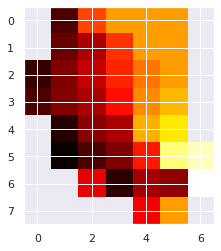

In [672]:
plt.imshow(df_2d_vs3d_table, cmap='hot')

In [682]:
ax.pcolormesh(df_2d_vs3d_sig['AUC'].values, df_2d_vs3d_sig['AUC'].values, df_2d_vs3d_sig['AUC'].values, cmap='RdBu')




ValueError: not enough values to unpack (expected 2, got 1)

In [678]:
df_2d_vs3d_table

DEGREE_NULL_AUC       0.2       0.3       0.4       0.5       0.6       0.7  \
AUC                                                                           
0.3                   NaN  0.350000  0.533333  0.600000  0.600000  0.600000   
0.4                   NaN  0.370588  0.422222  0.519444  0.600000  0.600000   
0.5              0.333333  0.388312  0.439875  0.510881  0.571200  0.600000   
0.6              0.350000  0.391176  0.420248  0.493103  0.585294  0.622222   
0.7                   NaN  0.320000  0.394286  0.420833  0.612903  0.657143   
0.8                   NaN  0.300000  0.350000  0.387500  0.500000  0.733333   
0.9                   NaN       NaN  0.466667  0.325000  0.416667  0.400000   
1.0                   NaN       NaN       NaN       NaN  0.475000  0.600000   

DEGREE_NULL_AUC       0.8  
AUC                        
0.3                   NaN  
0.4                   NaN  
0.5                   NaN  
0.6                   NaN  
0.7                   NaN  
0.8              0.766667  
0.9              0.800000  
1.0                   NaN

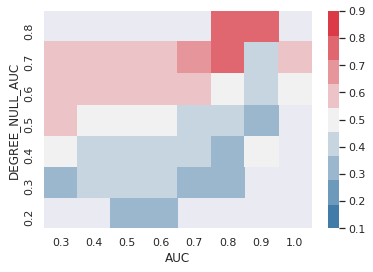

In [670]:
ax = sns.heatmap(df_2d_vs3d_table.T, vmin=0.1, vmax=0.9, cmap=sns.diverging_palette(240, 10, n=9))
ax.invert_yaxis()

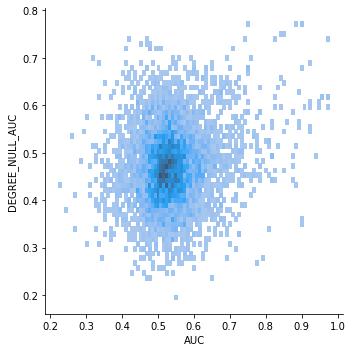

In [437]:
sns.displot(df_2d_vs3d, x='AUC', y='DEGREE_NULL_AUC',)

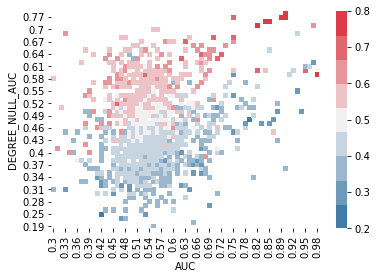

In [435]:
ax = sns.heatmap(df_2d_vs3d_table.T, vmin=0.2, vmax=0.8, cmap=sns.diverging_palette(240, 10, n=9))
ax.invert_yaxis()

In [345]:
auc_GO_terms

id       AUC
0      GO:0000002  0.598406
1      GO:0000003  0.461644
2      GO:0000009  0.242488
3      GO:0000010  0.709059
4      GO:0000012  0.393059
...           ...       ...
22512  GO:2001306  0.177526
22513  GO:2001311  0.375320
22514  GO:0003674  0.545226
22515  GO:0005575  0.496849
22516  GO:0008150  0.522923

[22517 rows x 2 columns]

In [51]:
go_df_scores = go_df.merge(df_id_scores, left_on=go_df.index, right_on=df_id_scores.index)

In [339]:
GO_groups = go_df.T.index.to_list()

In [800]:
go_df_scores

GO:0000002  GO:0000003  GO:0000009  GO:0000010  GO:0000012  \
key_0                                                                         
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         0.0         0.0   

                 GO:0000014  GO:0000015  GO:0000016  GO:0000018  GO:0000019  \
key_0                                                                         
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         1.0         0.0   

                 ...  GO:2001302  GO:2001303  GO:2001304  GO:2001306  \
key_0            ...                                                   
ENSG00000121410  ...         0.0         0.0         0.0         0.0   
ENSG00000175899  ...         0.0         0.0         0.0         0.0   
ENSG00000171428  ...         0.0         0.0         0.0         0.0   
ENSG00000196136  ...         0.0         0.0         0.0         0.0   
ENSG00000114771  ...         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
ENSG00000284753  ...         0.0         0.0         0.0         0.0   
ENSG00000267221  ...         0.0         0.0         0.0         0.0   
ENSG00000283288  ...         0.0         0.0         0.0         0.0   
ENSG00000273238  ...         0.0         0.0         0.0         0.0   
ENSG00000253251  ...         0.0         0.0         0.0         0.0   

                 GO:2001311  GO:0003674  GO:0005575  GO:0008150     score  \
key_0                                                                       
ENSG00000121410         0.0         1.0         1.0         1.0  0.817715   
ENSG00000175899         0.0         1.0         1.0         1.0  0.435028   
ENSG00000171428         0.0         1.0         1.0         1.0  0.437154   
ENSG00000196136         0.0         1.0         1.0         1.0  0.454531   
ENSG00000114771         0.0         1.0         1.0         1.0  0.591129   
...                     ...         ...         ...         ...       ...   
ENSG00000284753         0.0         1.0         0.0         1.0  0.815555   
ENSG00000267221         0.0         0.0         1.0         0.0  0.764673   
ENSG00000283288         0.0         0.0         1.0         0.0  0.771531   
ENSG00000273238         0.0         0.0         1.0         0.0  0.413740   
ENSG00000253251         0.0         1.0         1.0         1.0  0.694408   

                  rank

In [69]:
go_df.sum().min()

1.0

In [53]:
go_df_scores['GO:0005249'].max()

1.0

In [57]:
go_df_scores.set_index('key_0', inplace=True)

In [236]:
go_df_scores['ranked'] = all_group_scores

In [288]:
go_scores = go_df_scores[go_df_scores['GO:0048511'] > 0]['ranked']

In [795]:
go_df_scores

GO:0000002  GO:0000003  GO:0000009  GO:0000010  GO:0000012  \
key_0                                                                         
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         0.0         0.0   

                 GO:0000014  GO:0000015  GO:0000016  GO:0000018  GO:0000019  \
key_0                                                                         
ENSG00000121410         0.0         0.0         0.0         0.0         0.0   
ENSG00000175899         0.0         0.0         0.0         0.0         0.0   
ENSG00000171428         0.0         0.0         0.0         0.0         0.0   
ENSG00000196136         0.0         0.0         0.0         0.0         0.0   
ENSG00000114771         0.0         0.0         0.0         0.0         0.0   
...                     ...         ...         ...         ...         ...   
ENSG00000284753         0.0         0.0         0.0         0.0         0.0   
ENSG00000267221         0.0         0.0         0.0         0.0         0.0   
ENSG00000283288         0.0         0.0         0.0         0.0         0.0   
ENSG00000273238         0.0         0.0         0.0         0.0         0.0   
ENSG00000253251         0.0         0.0         0.0         1.0         0.0   

                 ...  GO:2001302  GO:2001303  GO:2001304  GO:2001306  \
key_0            ...                                                   
ENSG00000121410  ...         0.0         0.0         0.0         0.0   
ENSG00000175899  ...         0.0         0.0         0.0         0.0   
ENSG00000171428  ...         0.0         0.0         0.0         0.0   
ENSG00000196136  ...         0.0         0.0         0.0         0.0   
ENSG00000114771  ...         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
ENSG00000284753  ...         0.0         0.0         0.0         0.0   
ENSG00000267221  ...         0.0         0.0         0.0         0.0   
ENSG00000283288  ...         0.0         0.0         0.0         0.0   
ENSG00000273238  ...         0.0         0.0         0.0         0.0   
ENSG00000253251  ...         0.0         0.0         0.0         0.0   

                 GO:2001311  GO:0003674  GO:0005575  GO:0008150     score  \
key_0                                                                       
ENSG00000121410         0.0         1.0         1.0         1.0  0.817715   
ENSG00000175899         0.0         1.0         1.0         1.0  0.435028   
ENSG00000171428         0.0         1.0         1.0         1.0  0.437154   
ENSG00000196136         0.0         1.0         1.0         1.0  0.454531   
ENSG00000114771         0.0         1.0         1.0         1.0  0.591129   
...                     ...         ...         ...         ...       ...   
ENSG00000284753         0.0         1.0         0.0         1.0  0.815555   
ENSG00000267221         0.0         0.0         1.0         0.0  0.764673   
ENSG00000283288         0.0         0.0         1.0         0.0  0.771531   
ENSG00000273238         0.0         0.0         1.0         0.0  0.413740   
ENSG00000253251         0.0         1.0         1.0         1.0  0.694408   

                  rank

In [267]:
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    group_scores = np.apply_along_axis(rank_abs, 0, go_scores.values)

In [268]:
group_scores.shape

(77,)

In [290]:
R1 = go_scores.sum()/go_scores.shape[0]

In [291]:
R1

7556.9857142857145

In [294]:
n1= go_scores.shape[0]

In [295]:
n1

245

In [273]:
go_df_scores['score'].values

array([0.81771512, 0.43502779, 0.43715404, ..., 0.77153145, 0.41374046,
       0.6944077 ])

In [274]:
all_group_scores = np.apply_along_axis(rank_abs, 0, go_df_scores['score'].values)

In [275]:
all_group_scores

array([14135.,   726.,   751., ..., 12809.,   529.,  9297.])

In [296]:
R2 = go_df_scores['ranked'].sum()/go_df_scores['ranked'].shape[0]

In [297]:
R2

7805.5

In [278]:
n2= .shape[0]

In [279]:
n2

15610

In [280]:
U1 = (n1* n2) + ((n1 * (n1 + 1)) / 2) - R1

In [281]:
U2 = (n2* n2) + ((n1 * (n2 + 1)) / 2) - R2

In [282]:
U = max(U1,U2)

In [283]:
Z = (U- (n1* n2)/2)  / np.sqrt (n1*n2*(n1+n2+1)/12)

In [284]:
Z

6146.841028808939

In [211]:
    Z = bottleneck.nansum(Z) 
    #Calc ROC of Neighbor Voting

    P = stats.norm.sf(Z)

In [213]:
P

0.0

In [285]:
stats.norm.sf(Z) 

0.0

In [286]:
stats.norm.cdf(Z)

1.0